By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/08

Videos:
* [[10分鐘搞懂機器學習] 2.1 Machine Learning 初學者教學 機器學習入門 Python深度學習 ML Mindset](https://youtu.be/9tV5Ogaa_n8?si=pla4egT9k3-RfT4T)
* [[10分鐘搞懂機器學習] 2.2 用ChatGPT 撰寫Python 程式 線性迴歸](https://youtu.be/J-QUaE86DHQ?si=brOMzI7FIUM8sYS1)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


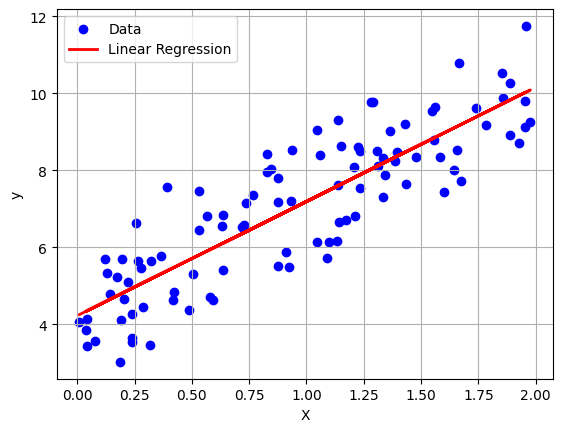

In [ ]:
# Ex1: data from a linear function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 生成隨機數據
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 生成100個介於0和2之間的隨機數 (機率:高斯分布)
y = 4 + 3 * X + np.random.randn(100, 1)  # 生成具有一些噪聲的y值  (微積分:函數轉換)

# 使用線性回歸模型擬合數據
model = LinearRegression()
model.fit(X, y) # 找適合的模型來擬合資料

# 繪製數據點
plt.scatter(X, y, color='blue', label='Data')

# 繪製擬合的線性回歸線
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')

plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


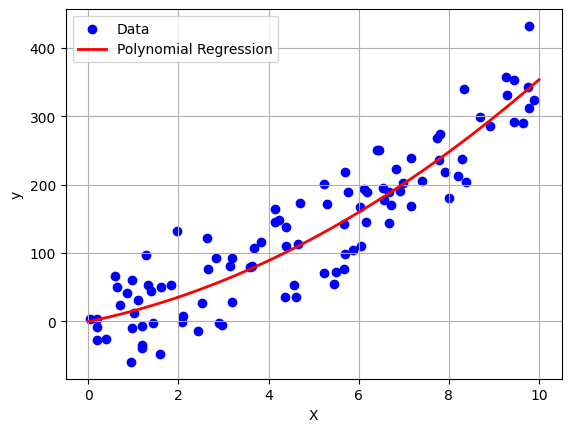

In [ ]:
# Ex2: data from a quadratic function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 生成隨機數據
x_range=10
np.random.seed(0)
X = x_range * np.random.rand(100, 1)  # 生成100個介於0和10之間的隨機數
y = 1.5 + 6*X + 3 * X**2  + 45*np.random.randn(100, 1)  # 生成具有一些噪聲的y值

# 使用多項式特徵將X轉換為X^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 使用線性回歸模型擬合數據
model = LinearRegression()
model.fit(X_poly, y)

# 準備數據以繪製圖形
X_new = np.linspace(0, x_range, 100).reshape(-1, 1)  # 生成用於繪圖的新數據
X_new_poly = poly_features.transform(X_new)  # 將新數據轉換為多項式特徵
y_new = model.predict(X_new_poly)  # 預測新數據的y值

# 繪製數據點
plt.scatter(X, y, color='blue', label='Data')

# 繪製擬合的線性回歸線
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial Regression')

# plt.title('Polynomial Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.intercept_, model.coef_    # y=1.5 + 6*X + 3*X**2

(array([31.53652653]), array([[0.44483545, 0.73528831]]))

Coefficients: [[0.44483545 0.73528831]]
Intercept: [31.53652653]


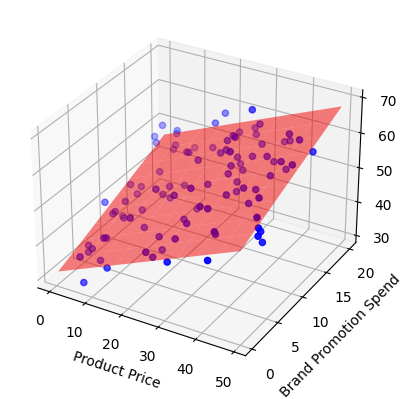

In [ ]:
# Ex3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 產生隨機數據
np.random.seed(0)
n_samples = 100
product_price = 50 * np.random.rand(n_samples, 1)  # 產品價格
brand_promotion = 20 * np.random.rand(n_samples, 1)  # 品牌推廣花費
sales = 30 + 0.5 * product_price + 0.8 * brand_promotion + np.random.randn(n_samples, 1) * 5  # 產品銷量，帶有隨機噪聲

# 合併特徵
X = np.concatenate((product_price, brand_promotion), axis=1)

# 擬合線性回歸模型
model = LinearRegression()
model.fit(X, sales)

# 提取模型參數
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# 繪製數據和模型預測
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(product_price, brand_promotion, sales, color='blue', label='Data points')
ax.set_xlabel('Product Price')
ax.set_ylabel('Brand Promotion Spend')
ax.set_zlabel('Sales')

# 生成預測網格
price_range = np.linspace(min(product_price), max(product_price), 10)
promotion_range = np.linspace(min(brand_promotion), max(brand_promotion), 10)
X_grid, Y_grid = np.meshgrid(price_range, promotion_range)
Z_pred = model.predict(np.array([X_grid.flatten(), Y_grid.flatten()]).T)
Z_grid = Z_pred.reshape(X_grid.shape)

# 繪製模型預測平面
ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='red', label='Regression Plane')

# 添加圖例


plt.show()




